In [136]:
# We'll need numpy for some mathematical operations
import numpy as np

# Librosa for audio
import librosa

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline
# And seaborn to make it look nice
import seaborn
seaborn.set(style='ticks')

# and IPython.display for audio output
import IPython.display

import conceptor.util as util
import conceptor.reservoir as reservoir
import conceptor.logic as logic

In [137]:
audio_path = './new_obama_trng.wav'
y_obama, sr = librosa.load(audio_path, sr = 44100)
audio_path = './other_trng.wav'
y_other, sr = librosa.load(audio_path, sr = 44100)
audio_path = './temp.wav'
y_test, sr = librosa.load(audio_path, sr = 44100)

In [135]:
def preprocessing(y, sr, n_mfcc):
    mfcc = librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 13)

    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order = 2)

    plt.figure(figsize=(12, 6))

    plt.subplot(3,1,1)
    librosa.display.specshow(mfcc)
    plt.ylabel('MFCC')
    plt.colorbar()

    plt.subplot(3,1,2)
    librosa.display.specshow(delta_mfcc)
    plt.ylabel('MFCC-$\Delta$')
    plt.colorbar()

    plt.subplot(3,1,3)
    librosa.display.specshow(delta2_mfcc, sr = sr, x_axis='time')
    plt.ylabel('MFCC-$\Delta^2$')
    plt.colorbar()

    plt.tight_layout()

    nmfcc = (mfcc + 1000) / 1500
    ndelta_mfcc = (delta_mfcc + 100) / 200
    ndelta2_mfcc = (delta2_mfcc + 50) / 100

    M = np.vstack([nmfcc, ndelta_mfcc, ndelta2_mfcc])
    return M

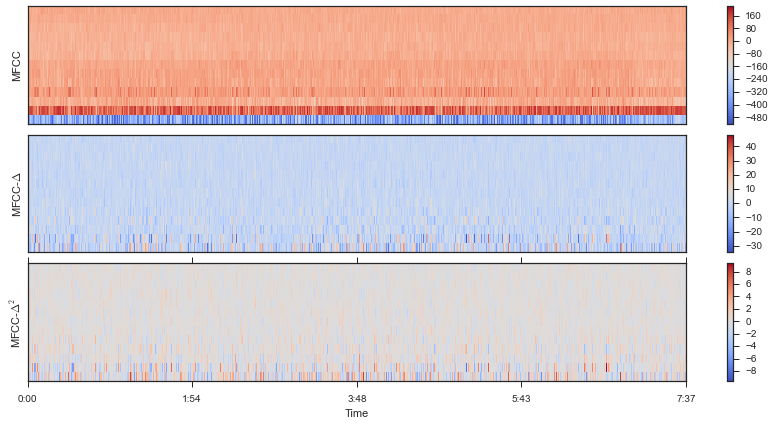

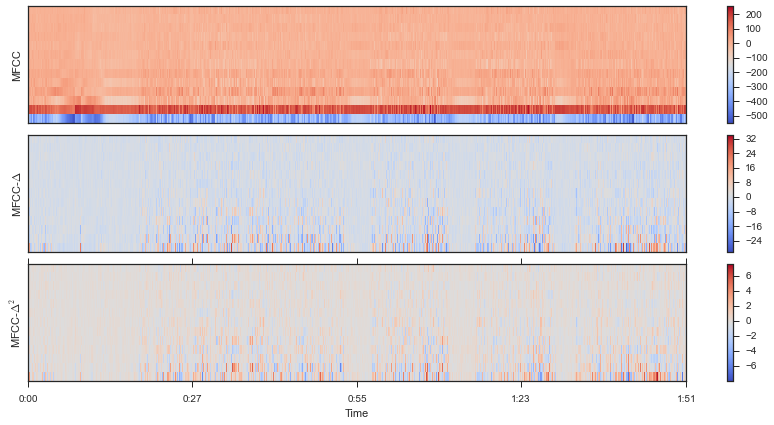

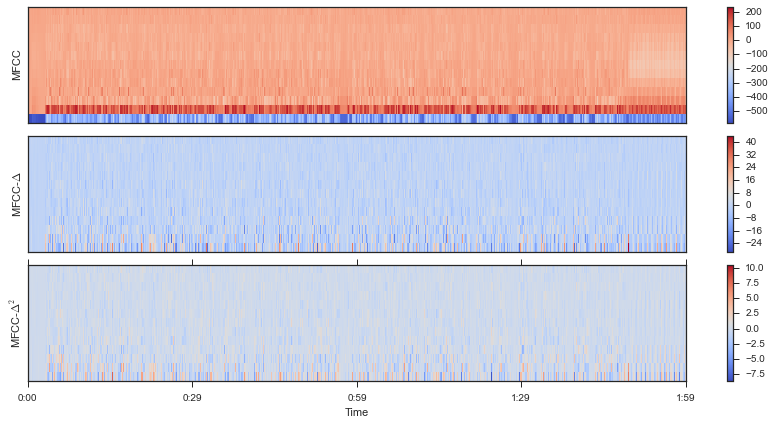

In [138]:
M_obama = preprocessing(y_obama, sr, 13)
M_other = preprocessing(y_other, sr, 13)
M_test = preprocessing(y_test, sr, 13)

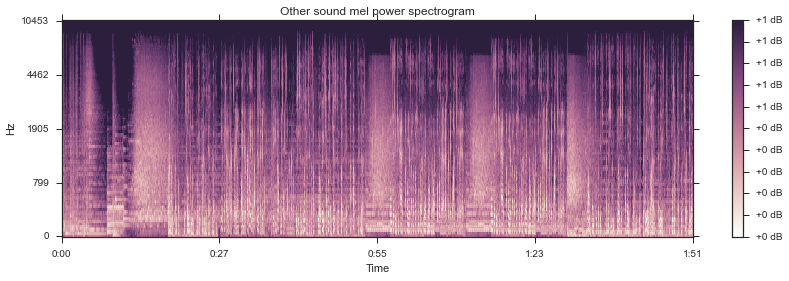

In [87]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_other = librosa.feature.melspectrogram(y_other, sr = sr, n_mels = 128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S_other = librosa.logamplitude(S_other, ref_power = np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(power_other, sr = sr, x_axis = 'time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Other sound mel power spectrogram')

# draw a color bar
plt.colorbar(format = '%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

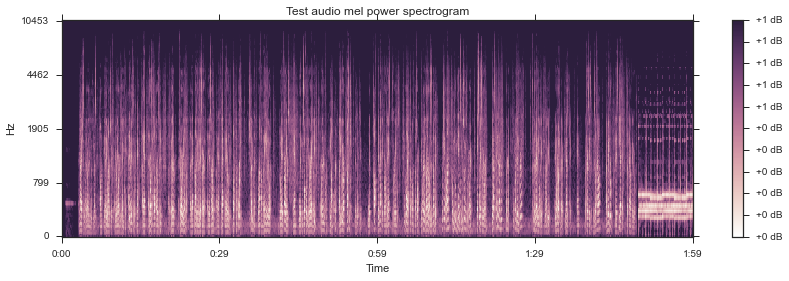

In [89]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_test = librosa.feature.melspectrogram(y_test, sr = sr, n_mels = 128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S_test = librosa.logamplitude(S_test, ref_power = np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(power_test, sr = sr, x_axis = 'time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Test audio mel power spectrogram')

# draw a color bar
plt.colorbar(format = '%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [6]:
power_obama = - log_S_obama / 80
power_other = - log_S_other / 80
power_test = - log_S_test / 80

In [7]:
timevec_obama = util.consecdata(M_obama, 3)
timevec_other = util.consecdata(M_other, 3)
timevec_test = util.consecdata(M_test, 3)

In [141]:
M_obama.shape

(39, 39402)

In [118]:
from imp import reload
reload(reservoir)
RNN = reservoir.Reservoir(39, 10, sr = 1.2, in_scale = 0.2, bias_scale = 1)

In [119]:
states_obama, rawstates_obama = RNN.augment(timevec_obama)
states_other, rawstates_other = RNN.augment(timevec_other)
states_test, rawstates_test = RNN.augment(timevec_test)

In [143]:
consecdata_obama = np.concatenate((timevec_obama, rawstates_obama), axis = 0)
consecdata_other = np.concatenate((timevec_other, rawstates_other), axis = 0)
consecdata_test = np.concatenate((timevec_test, rawstates_test), axis = 0)

In [145]:
data_obama = consecdata_obama.swapaxes(1,2).reshape(-1, consecdata_obama.shape[1], order = 'F')
data_other = consecdata_other.swapaxes(1,2).reshape(-1, consecdata_other.shape[1], order = 'F')
data_test = consecdata_test.swapaxes(1,2).reshape(-1, consecdata_test.shape[1], order = 'F')

In [146]:
C_list, R_list, C_prem_list, apt_list = RNN.recognition_train([data_obama, data_other], out_mode = 'complete')

In [149]:
results, evidence = RNN.recognition_predict(data_test, C_list)

In [154]:
statesnorm_test = np.sum(data_test * data_test, axis = 0)

In [155]:
evidencerate = evidence[0] / statesnorm_test

In [132]:
eviresult = evidencerate > 0.914

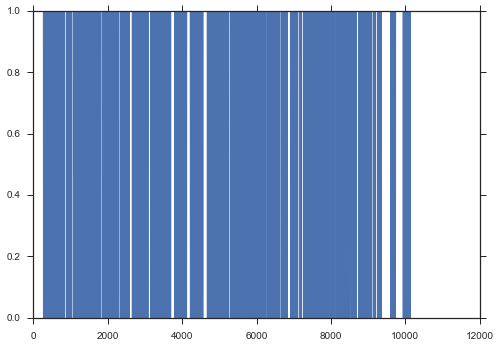

In [150]:
plt.plot(results)

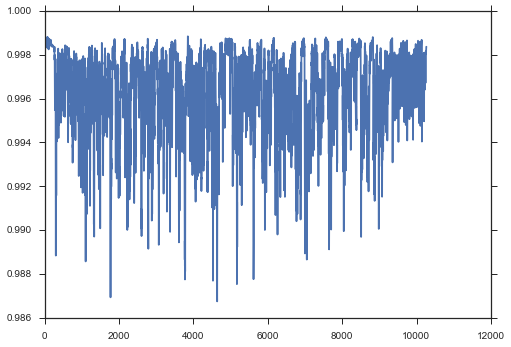

In [159]:
plt.plot(evidencerate)

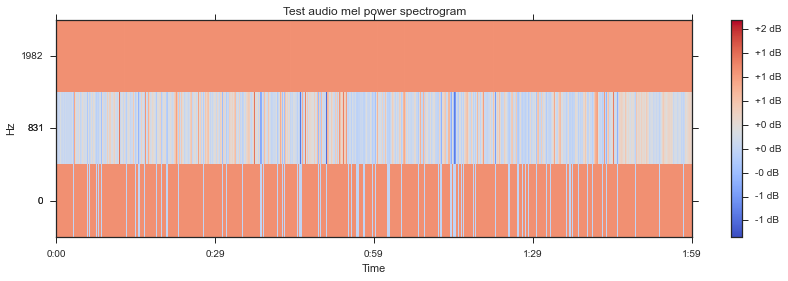

In [158]:
# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(np.vstack((results, evidence[1] - evidence[0], evidencerate)), sr = sr, x_axis = 'time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('Test audio mel power spectrogram')

# draw a color bar
plt.colorbar(format = '%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [81]:
apN = 9
import scipy as sp
Cnorm_list = []
for i in range(apN):
        C_temp = logic.PHI(C_prem, 2 ** apsExploreExponents[i])
        Cnorm_list.append(np.linalg.norm(C_temp ,'fro') ** 2)
      norms = np.asarray(Cnorm_list)
      interpfun = sp.interpolate.interp1d(apsExploreExponents, norms, kind = 'cubic')
      norms_Intpl = interpfun(intPts)
      norms_Intpl_Grad = (norms_Intpl[1:] - norms_Intpl[0:-1]) / 0.01
      aptind = np.argmax(abs(norms_Intpl_Grad), axis = 0)
      apt = 2 ** intPts[aptind]

array([[ 127.97962068,  127.97962068,  127.97962068, ...,  127.97962068,
         127.97962068,  127.97962068],
       [ 127.940296  ,  127.940296  ,  127.940296  , ...,  127.940296  ,
         127.940296  ,  127.940296  ]])

In [83]:
R_obama = power_obama.dot(power_obama.T)) / power_obama.shape[1]
R_other = power_other.dot(power_other.T)) / power_other.shape[1]


array([[  4.71574976e-01,   3.25684562e-01,   2.50319895e-01, ...,
          3.61341159e-01,   3.61341621e-01,   3.61340688e-01],
       [  3.25684562e-01,   2.24216820e-01,   1.68155362e-01, ...,
          2.18691967e-01,   2.18692387e-01,   2.18691617e-01],
       [  2.50319895e-01,   1.68155362e-01,   1.22030900e-01, ...,
          1.42735663e-01,   1.42736053e-01,   1.42735348e-01],
       ..., 
       [  3.61341159e-01,   2.18691967e-01,   1.42735663e-01, ...,
          5.68357533e-05,   5.76190034e-05,   5.59461899e-05],
       [  3.61341621e-01,   2.18692387e-01,   1.42736053e-01, ...,
          5.76190034e-05,   5.84005202e-05,   5.67312207e-05],
       [  3.61340688e-01,   2.18691617e-01,   1.42735348e-01, ...,
          5.59461899e-05,   5.67312207e-05,   5.50455430e-05]])

In [85]:
R_obama = (power_obama.dot(power_obama.T)) / power_obama.shape[1]
R_other = (power_other.dot(power_other.T)) / power_other.shape[1]


In [86]:
R_obama - R_other

array([[  4.71574976e-01,   3.25684562e-01,   2.50319895e-01, ...,
          3.61341159e-01,   3.61341621e-01,   3.61340688e-01],
       [  3.25684562e-01,   2.24216820e-01,   1.68155362e-01, ...,
          2.18691967e-01,   2.18692387e-01,   2.18691617e-01],
       [  2.50319895e-01,   1.68155362e-01,   1.22030900e-01, ...,
          1.42735663e-01,   1.42736053e-01,   1.42735348e-01],
       ..., 
       [  3.61341159e-01,   2.18691967e-01,   1.42735663e-01, ...,
          5.68357533e-05,   5.76190034e-05,   5.59461899e-05],
       [  3.61341621e-01,   2.18692387e-01,   1.42736053e-01, ...,
          5.76190034e-05,   5.84005202e-05,   5.67312207e-05],
       [  3.61340688e-01,   2.18691617e-01,   1.42735348e-01, ...,
          5.59461899e-05,   5.67312207e-05,   5.50455430e-05]])